In [1]:
import numpy as np
from matplotlib.pyplot import plot


In [2]:
P1=np.loadtxt("PSDSData (10)_762d984b56548c52_raw.csv",delimiter=",")
P2=np.loadtxt("PSDSData (10)_ee4c2f1426cbf203_raw.csv",delimiter=",")

In [5]:
Pdata=np.empty([0,9])
Pdata=np.append(Pdata,P1,axis=0)
Pdata=np.append(Pdata,P2,axis=0)

In [7]:
np.savetxt('data_raw_100Hz.csv',Pdata,delimiter=',')

In [6]:
Pdata.shape

(512141, 9)

In [3]:
P1.shape

(462239, 9)

In [4]:
P2.shape

(49902, 9)

In [5]:
watch_39_raw = np.loadtxt('WatchData (39)_3b9d2af8cebfb9d8_raw.csv',delimiter=",")
watch_39_raw = watch_39_raw [16000:,:]
watch_36_raw = np.loadtxt('WatchData (36)_raw.csv',delimiter=",")
watch_34_raw = np.loadtxt('WatchData (34)_raw.csv',delimiter=",")
watch_33_raw = np.loadtxt('watch_33_raw.csv',delimiter=",")

In [8]:
watch_33_y = np.loadtxt('watch_33_y.csv',delimiter=',')
watch_34_y = np.loadtxt('watch_34_y.csv',delimiter=',')
watch_36_y = np.loadtxt('watch_36_y.csv',delimiter=',')
watch_39_y = np.zeros([len(watch_39_raw )])

In [7]:
watch_39_raw = watch_39_raw [16000:,:]
watch_39_raw.shape

(1492339, 9)

In [9]:
watch_39_y.shape

(1492339,)

In [11]:
data_raw=np.empty([0,9])
data_raw=np.append(data_raw,watch_33_raw,axis=0)
data_raw=np.append(data_raw,watch_34_raw,axis=0)
data_raw=np.append(data_raw,watch_36_raw,axis=0)
data_raw=np.append(data_raw,watch_39_raw,axis=0)
data_raw.shape

(1656856, 9)

In [12]:
data_y=np.empty([0])
data_y = np.append(data_y,watch_33_y,axis=0)
data_y = np.append(data_y,watch_34_y,axis=0)
data_y = np.append(data_y,watch_36_y,axis=0)
data_y = np.append(data_y,watch_39_y,axis=0)
data_y.shape

(1656856,)

In [13]:
np.savetxt('data_raw_v2.csv',data_raw,delimiter=',')
np.savetxt('data_y_v2.csv',data_y,delimiter=',')

Remove none activity data from the raw data

In [19]:
text_file = open("NoActivityForFullData.annotation~", "r")
lines = text_file.readlines()
text_file.close()
print (len(lines))

15


In [20]:
NoAct=[]
for i in range(len(lines)):
    NoAct.append([int(float(lines[i].split(';')[0])*25),int(float(lines[i].split(';')[1])*25)])
NoAct=np.asarray(NoAct)    

In [21]:
NoAct.shape

(15, 2)

In [39]:
NoActIndex=np.empty((0),dtype='int')
for i in range(len(NoAct)):
    for j in np.arange(NoAct[i][0],NoAct[i][1]):
        NoActIndex = np.append(NoActIndex,int(j))
NoActIndex.shape

(68138,)

In [54]:
AllDataIndex = np.arange(len(data_raw)).tolist()

In [56]:
for x in NoActIndex.tolist():
    AllDataIndex.remove(x)

In [58]:
len(AllDataIndex)

96379

In [62]:
NoActData=data_raw[NoActIndex.tolist()]
NoActDataY = data_y[NoActIndex.tolist()]

In [42]:
NoActData.shape

(68138, 9)

In [64]:
activateData = data_raw[AllDataIndex]
activateDataY = data_y[AllDataIndex]

In [75]:
np.savetxt('data_raw_active.csv',activateData,delimiter=',')
np.savetxt('data_y_active.csv',activateDataY,delimiter=',')

In [60]:
activateData.shape

(96379, 9)

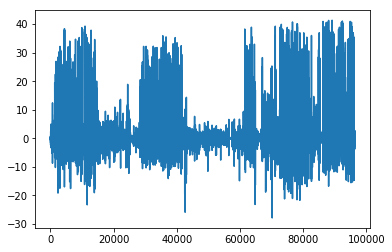

In [74]:
plot(activateData[:,5])